# Import

In [21]:
# Data manipulation
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# previously mounted Google Drive

path = '/content/drive/MyDrive/Data_Science/Data Analytics/ProfessionAI/Fondamenti ML/credit_card_customers.csv'

df = pd.read_csv(path)

# EDA

**I'll drop `CUST_ID`** because it has unique values, which makes it unuseful for the model.

**I'm doing it now to speed up processes, expecially boxenplot part of the code.**

In [3]:
df.shape

(8950, 18)

In [4]:
# First, let's check if it is True that `CUST_ID` has unique values
df.shape[0] == df['CUST_ID'].nunique()

True

In [5]:
df = df.drop('CUST_ID', axis=1)

In [6]:
df.shape

(8950, 17)

## Distributions

In [ ]:
# Check distribution of numeric col (pandas default behaviour)
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


I've noticed that `MINIMUM_PAYMENTS` has max bigger than the max in `PAYMENTS`, so let's check how many credit card holders present the same issue.

In [ ]:
# count % of rows that have MINIMUM_PAYMENTS bigger than PAYMENTS
round((df['MINIMUM_PAYMENTS'] > df['PAYMENTS']).sum()/len(df)*100,2)

26.42

**It is a huge percentage, that drive me think that one of these col is inconsistent**.

Let's dive further into distributions with **boxenplots**.
We decide to exclude some features like frequency ones because we saw in df.describe() that they start from 0 and end in 1, so they seem to be reliable.

Reference: https://medium.com/towards-data-science/letter-value-plot-the-easy-to-understand-boxplot-for-large-datasets-12d6c1279c97

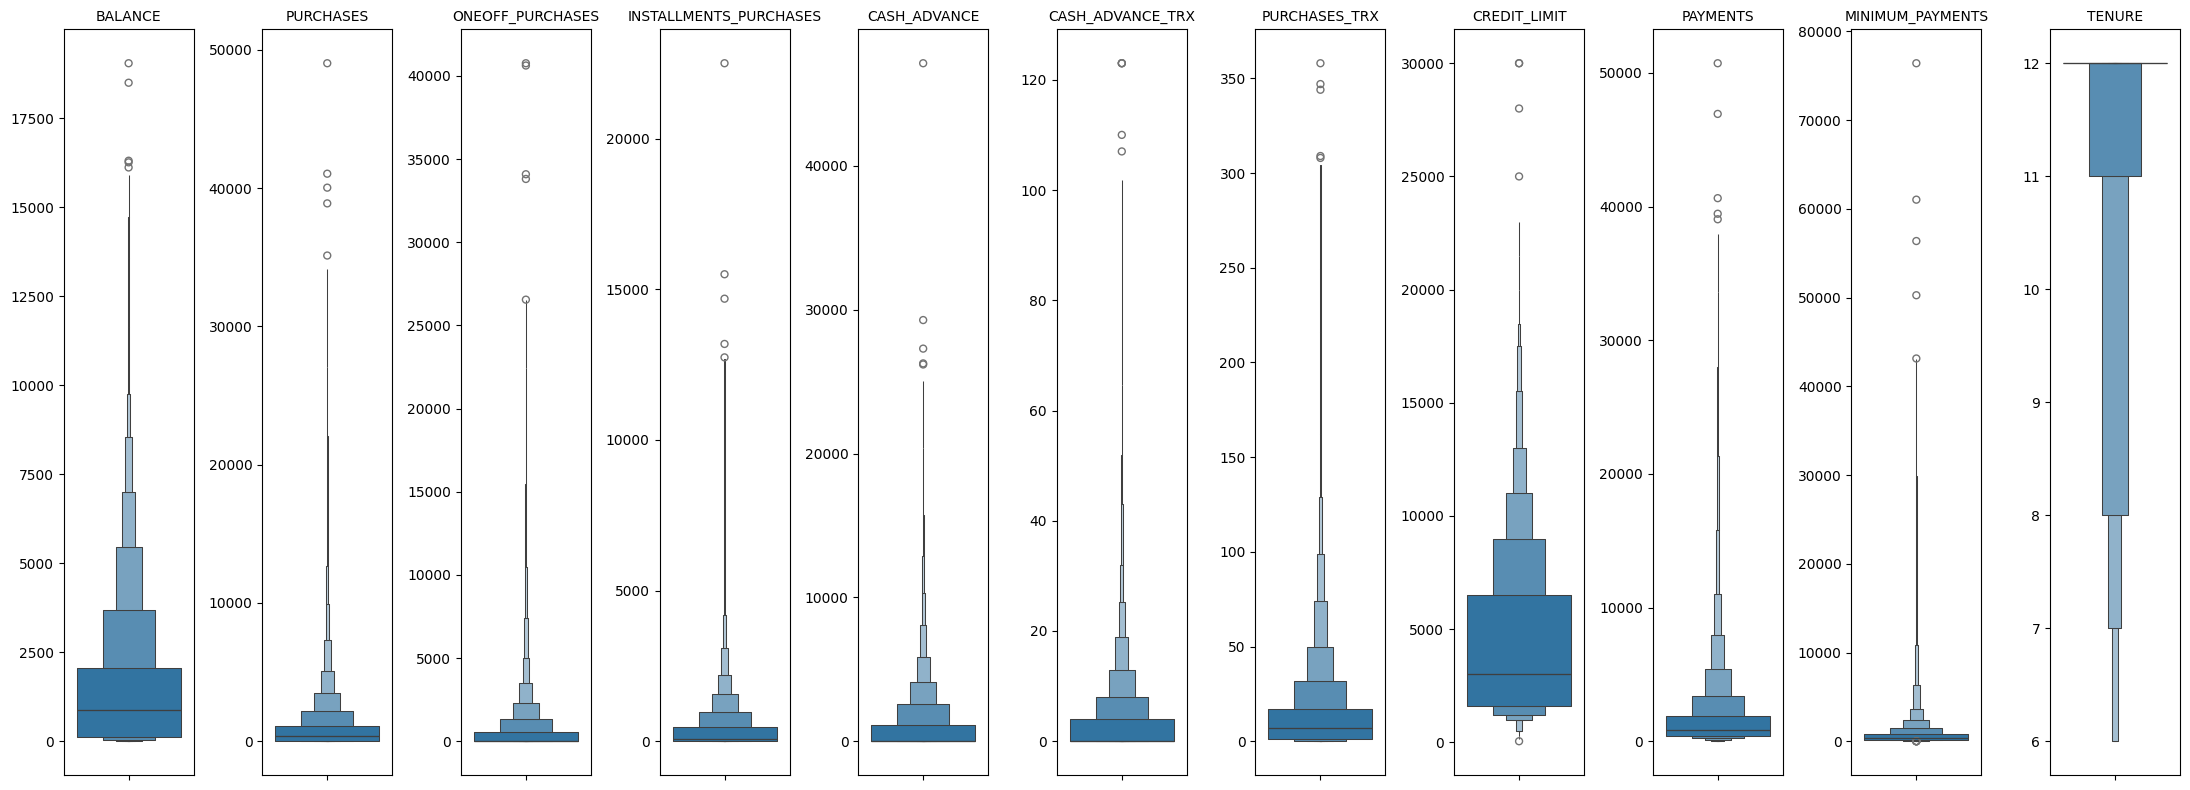

In [ ]:
# Y-axis scaled individually for each feature

# Remove columns containing "FREQUENCY" and explicitly remove "PRC_FULL_PAYMENT"
numerical_features = [col for col in df.columns if 'FREQUENCY' not in col and col != 'PRC_FULL_PAYMENT']

# Create a figure with a single row and multiple columns
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(len(numerical_features) * 2, 8))

# Creating a boxenplot for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxenplot(ax=axes[i], data=df, y=feature)
    axes[i].set_title(feature, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

## Missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

`CREDIT_LIMIT`, `PAYMENTS` and `MINIMUM_PAYMENTS` have some null values.

For now let's also keep Dtype mapping as it is.

# Preprocessing

## Drop cols

**I'll go for dropping `PAYMENTS`** because could be an unreliable feature for the model.

In [7]:
df.shape

(8950, 17)

In [8]:
df = df.drop('PAYMENTS', axis=1)

In [9]:
df.shape

(8950, 16)

## Missing values

In [ ]:
df_credit_limit_null = df[df['CREDIT_LIMIT'].isna()]

df_minimum_payments_null = df[df['MINIMUM_PAYMENTS'].isna()]

In [ ]:
df_credit_limit_null.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,14.418723,0.0,6


This customer seems to not have a `CREDIT_LIMIT`. We can do imputing but for now let's try to **drop it** and go without it.

In [10]:
df = df.drop(index=5203)

In [11]:
df.shape

(8949, 16)

In [ ]:
df_minimum_payments_null.shape[0]

313

We have a large number of people who do not have a `MINIMUM_PAYMENTS`, let's do **imputation** of the median, that is more robust than the mean.

In [ ]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [ ]:
# Check
df[df['MINIMUM_PAYMENTS'].isna()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


## Standardization

In [13]:
# Standardize all feature for consistence
features_to_scale = df.columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization only to the selected columns
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Clustering

## How many

We can check the "goodness" of the fit by looking at `model.inertia_`, which contains the sum of squared distances of samples to their closest cluster center, and silhouette_score.

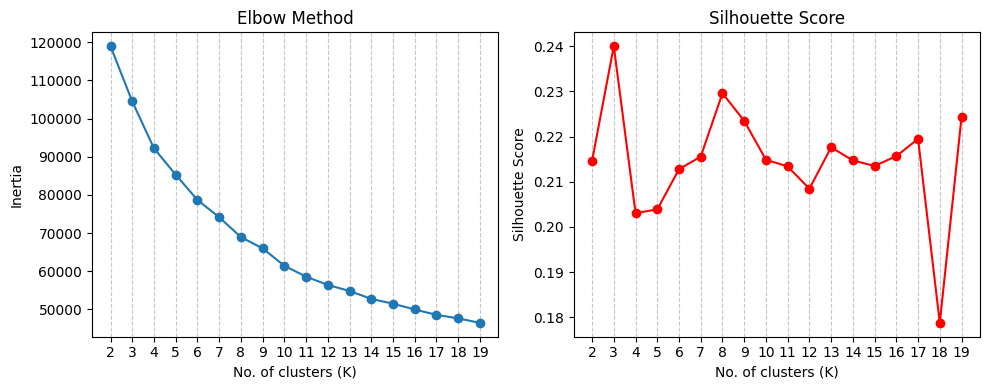

CPU times: user 36 s, sys: 15.9 s, total: 51.9 s
Wall time: 41.5 s


In [17]:
%%time

# possible k values
options = range(2, 20)

# list inizialiting
inertias = []
silhouettes = []

# Test model for every k value
for n_clusters in options:
    model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(df)
    # n_init=10 avoids warnings and ensures a good initialization of the centroids

    # save inertia
    inertias.append(model.inertia_)

    # save silhouette score
    silhouettes.append(silhouette_score(df, model.labels_))

# Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(options) # force plt to integer in the axes
plt.grid(axis='x', linestyle='--', alpha=0.7) # to clearly match point to number

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(options, silhouettes, '-o', color='red')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.xticks(options) # force plt to integer in the axes
plt.grid(axis='x', linestyle='--', alpha=0.7) # to clearly match point to number

plt.tight_layout()
plt.show()

The inertia curve does not show a clear elbow, meaning there is no obvious "best" K from this method alone.

K=3 has the highest Silhouette Score (~0.24), indicating the best cluster separation.

**I'll try 3 also to avoid having clusters with few credit card holders**.

## Model

In [18]:
df_k3 = df.copy()

model_k3 = KMeans(n_clusters=3, random_state=42, n_init=10)
model_k3.fit(df_k3)

preds = model_k3.predict(df_k3)
df_k3['Cluster'] = preds

df_k3['Cluster'].value_counts()

,count
Cluster,
2,5913
1,1589
0,1447


## Cluster interpretation

In [23]:
# Reverse standardization manually using scaler's mean and scale
def reverse_standardization(scaled_means, scaler, feature_names):
    original_means = scaled_means.copy()
    for feature in feature_names:
        index = list(df_k3.columns).index(feature)  # Find correct index in the scaler
        original_means[feature] = (scaled_means[feature] * scaler.scale_[index]) + scaler.mean_[index]
    return original_means

# Compute the mean for each category by cluster
spending_means = df_k3.groupby('Cluster')[spending_features].mean()
payment_means = df_k3.groupby('Cluster')[payment_features].mean()
usage_means = df_k3.groupby('Cluster')[usage_features].mean()

# Apply manual inverse transformation
spending_means_original = reverse_standardization(spending_means, scaler, spending_features)
payment_means_original = reverse_standardization(payment_means, scaler, payment_features)
usage_means_original = reverse_standardization(usage_means, scaler, usage_features)

# Print results
print("### Average Spending per Cluster (Original Scale) ###")
print(spending_means_original, "\n")

print("### Payment Habits per Cluster (Original Scale) ###")
print(payment_means_original, "\n")

print("### Card Usage Frequency per Cluster (Original Scale) ###")
print(usage_means_original, "\n")

### Average Spending per Cluster (Original Scale) ###
             BALANCE  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
Cluster                                                       
0        2039.885200       2437.337554             1424.988950
1        3997.884368        249.587992              137.037766
2         794.466288        233.196636              236.655403 

### Payment Habits per Cluster (Original Scale) ###
         MINIMUM_PAYMENTS  PRC_FULL_PAYMENT
Cluster                                    
0             1114.711250          0.298648
1             1795.425453          0.030699
2              523.594932          0.151331 

### Card Usage Frequency per Cluster (Original Scale) ###
         CASH_ADVANCE  PURCHASES_FREQUENCY
Cluster                                   
0          395.806617             0.946640
1         3861.971484             0.236147
2          346.914382             0.447085 



### Consideration - Average Spending per Cluster

🔹 Cluster 0 has high one-time purchases (\~2400€) and also spends a lot in installments (~1400€). These could be frequent shoppers with high spending.

🔹 Cluster 1 has the highest balance (~4000€) but spends little on one-time and installment purchases. They might be users with high cash availability but low spending activity.

🔹 Cluster 2 has the lowest balance (~794€) and low spending in both one-time and installment purchases. They might be users with low purchasing power.

### Consideration - Payment Habits per Cluster

🔹 Cluster 0 pays 30% of the full balance, suggesting a more balanced payment management.

🔹 Cluster 1 barely pays the full balance (only 3%), so they could be users with high credit exposure.

🔹 Cluster 2 has the lowest value in MINIMUM_PAYMENTS, which suggests low card usage or less available credit.

### Consideration - Card Usage Frequency per Cluster

🔹 Cluster 0 has a very high purchase frequency (~0.94) and low cash advances. They are probably users who make frequent purchases with the card and pay directly.

🔹 Cluster 1 has the highest cash advance amount (~3861€) but low purchase frequency. These users likely use the card mainly for cash advances rather than purchases.

🔹 Cluster 2 has low values in both cash advances and purchase frequency, indicating users with lower financial activity.

# Recommended marketing strategies

## Cluster 0

Characteristics:

- High purchase frequency (\~0.94)
- High minimum payments (\~1114€), indicating regular card use
- Very high one-time purchases (\~2400€) and installment purchases (~1400€)

📢 Marketing Strategies:

✅ Cashback programs for high-value purchases → Encourage large transactions.  
✅ Promotions on installment purchases → E.g., reduced interest rates on installment payments.  
✅ Partnerships with premium brands → To drive purchases of high-end products.

## Cluster 1

Characteristics:

- High average balance (\~4000€) but low direct purchases
- Low full balance payment (\~3%) → Possible dependency on credit
- High cash advances (~3861€)

📢 Marketing Strategies:

✅ Investment and financial product proposals → These users could benefit from money management tools.  
✅ Personal loan offers → They have a high balance and may be interested in structured credit products.  
✅ Incentives for card purchases → Offer loyalty points to encourage card usage instead of cash advances.

## Cluster 2

Characteristics:

- Low balance (\~794€), minimal spending
- Low purchase frequency (\~0.44)
- Lowest minimum payments (~523€) → Possible low financial availability

📢 Marketing Strategies:

✅ Offers to increase credit limit → Encourage more purchases and greater card usage.  
✅ Discounts for frequent card usage → E.g., a discount on purchases after a certain number of transactions.  
✅ Loyalty programs with exclusive benefits → Access to events, rewards, or exclusive services to increase perceived value.